In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import mnist 
(train_images, train_labels),(test_images, test_labels)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print('train_images: '+ str(len(train_images))+ " test_images: " + str(len(test_images)))

train_images: 60000 test_images: 10000


In [4]:
print('train_images: '+ str((train_images.shape))+ " test_images: " + str((test_images.shape)))

train_images: (60000, 28, 28) test_images: (10000, 28, 28)


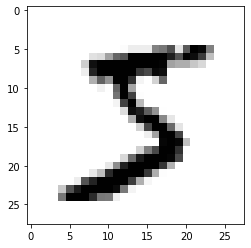

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap=plt.cm.binary )
plt.show()

In [6]:
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [7]:
from keras import layers
from keras import models

In [8]:
network= models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation ='softmax'))

2023-02-10 23:09:46.431564: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
from tensorflow.keras.utils import to_categorical
print(train_labels, test_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels, test_labels)

[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from keras import optimizers
network.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

In [11]:
dir(optimizers)

['Optimizer',
 'TFOptimizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'adadelta_v2',
 'adagrad_v2',
 'adam_v2',
 'adamax_v2',
 'backend',
 'deserialize',
 'deserialize_keras_object',
 'ftrl',
 'get',
 'gradient_descent_v2',
 'keras_export',
 'nadam_v2',
 'optimizer_v2',
 'rmsprop_v2',
 'serialize',
 'serialize_keras_object',
 'tf']

In [12]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

2023-02-10 23:09:48.006456: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0121 - accuracy: 0.9213
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0054 - accuracy: 0.9656
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0037 - accuracy: 0.9770
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0028 - accuracy: 0.9828
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0022 - accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0018 - accuracy: 0.9893
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0015 - accuracy: 0.9912
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0012 - accuracy: 0.9927
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 9.9771e-04 - accuracy: 0.9942
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 8.3019e-04 - accuracy

In [13]:
test_loss, test_accuracy =network.evaluate(test_images,test_labels)
print('test_loss' +str(test_loss) + 'test_accuracy' + str(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9782
test_loss0.0032210727222263813test_accuracy0.9782000184059143


**The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data**

In [14]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [15]:
train_data.shape

(25000,)

> **Since we restricted our data to 10000 words, no index would exceed 10000**

In [16]:
max([max(sequence) for sequence in train_data])

9999

> **word_index is a dictionary mapping words to an integer index.**

In [17]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [18]:
print('first ten keys:' +str( list(word_index.keys())[:10]))
print('first ten values:' +str( list(word_index.values())[:10]))

first ten keys:['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling']
first ten values:[34701, 52006, 52007, 16816, 63951, 1408, 16115, 2345, 2289, 52008]


> **Reverses it, mapping integer indices to words**

In [19]:
reverse_word_index = dict([(values, keys) for (keys,values) in word_index.items()])

In [20]:
train_data[0][0]

1

> **Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are
> reserved indices for “padding,” “start of sequence,” and “unknown.”**

In [21]:
len(train_data[0])

218

In [22]:
decoded_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])


> **Now we need to convert the integers into tensors**


**Encoding the integer sequences into a binary matrix**

> **The function below is going to convert our data in to vectors of 0s and 1s**

In [23]:
def vectorize(sequences,dimensions=10000):
    results=np.zeros((len(sequences),dimensions))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [24]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [25]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

> **labels should also be vectorized**

In [26]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [27]:
x_train[0].shape

(10000,)

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop',  loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
len(x_train)

25000

In [31]:
print(len(x_train[:10000]) )

10000


In [32]:
print(len(train_labels[:10000]) )

10000


> **Slicing the tensors now**

In [33]:
x_val = x_train[:10000]
x_partial =x_train[10000:]
y_val = y_train[:10000]
y_partial= y_train[10000:]
print('x_val: ' + str(len(x_val)) + 'y_val: ' + str(len(y_val))  + ' x_partial: ' + str(len(x_partial)) + ' y_partial: ' + str(len(y_partial))) 

x_val: 10000y_val: 10000 x_partial: 15000 y_partial: 15000


In [34]:
history = model.fit(x=x_partial,y=y_partial,epochs=20,validation_data=(x_val, y_val))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3453 - accuracy: 0.8570 - val_loss: 0.2735 - val_accuracy: 0.8919
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2044 - accuracy: 0.9223 - val_loss: 0.2875 - val_accuracy: 0.8878
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1586 - accuracy: 0.9415 - val_loss: 0.3259 - val_accuracy: 0.8819
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1296 - accuracy: 0.9530 - val_loss: 0.3536 - val_accuracy: 0.8814
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1074 - accuracy: 0.9621 - val_loss: 0.3835 - val_accuracy: 0.8795
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0861 - accuracy: 0.9687 - val_loss: 0.4360 - val_accuracy: 0.8776
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0716 - accuracy: 0.9739 - val_loss: 0.4928 - val_accuracy: 0.8739
Epoch 

> **Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened
> during training. Let’s look at it:**

In [35]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
loss_values= history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values= history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)

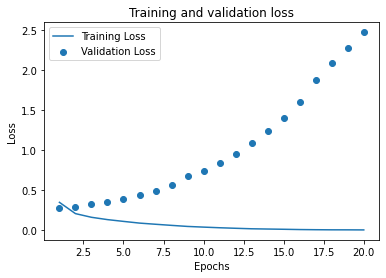

In [37]:
plt.plot(epochs,loss_values, label='Training Loss')
plt.scatter(epochs, val_loss_values, label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

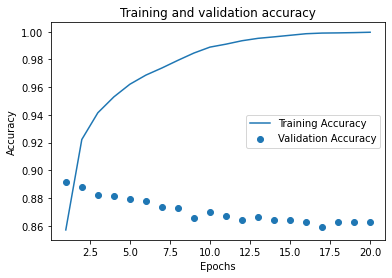

In [38]:
plt.plot(epochs,acc_values, label='Training Accuracy')
plt.scatter(epochs, val_acc_values, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [40]:
history2 =  model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results2 = model.evaluate(x_test, y_test)
print(results2)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4640 - accuracy: 0.8089 - val_loss: 0.2842 - val_accuracy: 0.9136
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2595 - accuracy: 0.9113 - val_loss: 0.2123 - val_accuracy: 0.9259
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1997 - accuracy: 0.9294 - val_loss: 0.1573 - val_accuracy: 0.9523
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3161 - accuracy: 0.8761
[0.3160858452320099, 0.8760799765586853]


In [41]:
history2_dict = history2.history
history2_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

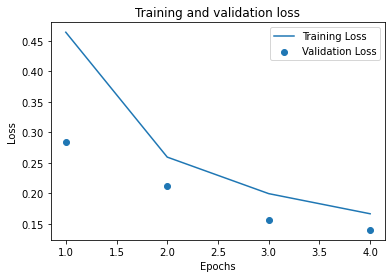

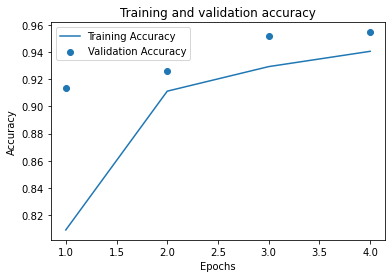

In [42]:
loss_values2= history2_dict['loss']
val_loss_values2 = history2_dict['val_loss']
acc_values2= history2_dict['accuracy']
val_acc_values2 = history2_dict['val_accuracy']
epochs2 = range(1,len(loss_values2)+1)

plt.plot(epochs2,loss_values2, label='Training Loss')
plt.scatter(epochs2, val_loss_values2, label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs2,acc_values2, label='Training Accuracy')
plt.scatter(epochs2, val_acc_values2, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
print(dir(model))

['_TF_MODULE_IGNORED_PROPERTIES', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_activity_regularizer', '_add_trackable', '_add_variable_with_custom_getter', '_assert_compile_was_called', '_assert_weights_created', '_auto_track_sub_layers', '_autocast', '_autographed_call', '_base_model_initialized', '_build_graph_network_for_inferred_shape', '_build_input_shape', '_call_accepts_kwargs', '_call_arg_was_passed', '_call_fn_arg_defaults', '_call_fn_arg_positions', '_call_fn_args', '_call_full_argspec', '_callable_losses', '_cast_single_input', '_check_call_args', '_checkpoint_dependencies', '_clear_losses', '_cluster_coordinator', '_compile_was_called'

> **Reduce the layers and retrain.**

In [44]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history3 = model.fit(x_train, y_train, epochs=4, batch_size=512 ,validation_data=(x_val, y_val))
results3 = model.evaluate(x_test, y_test)
print(results3)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4501 - accuracy: 0.8234 - val_loss: 0.3031 - val_accuracy: 0.9105
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2750 - accuracy: 0.9098 - val_loss: 0.2230 - val_accuracy: 0.9296
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2188 - accuracy: 0.9253 - val_loss: 0.1907 - val_accuracy: 0.9375
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.8863
[0.2824022173881531, 0.8863199949264526]


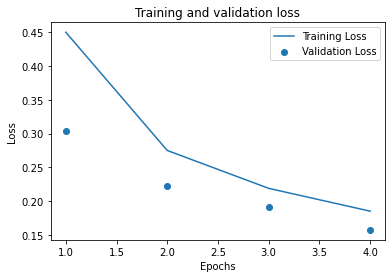

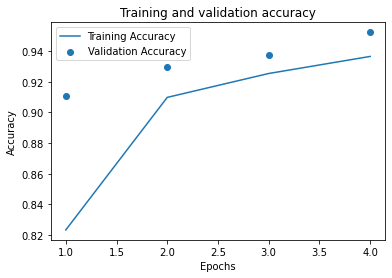

In [45]:
history3_dict = history3.history
history3_dict.keys()
loss_values3= history3_dict['loss']
val_loss_values3= history3_dict['val_loss']
acc_values3= history3_dict['accuracy']
val_acc_values3 = history3_dict['val_accuracy']
epochs3 = range(1,len(loss_values3)+1)

plt.plot(epochs3,loss_values3, label='Training Loss')
plt.scatter(epochs3, val_loss_values3, label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs3,acc_values3, label='Training Accuracy')
plt.scatter(epochs3, val_acc_values3, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> **Increase the layers**

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history4 = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
results4 = model.evaluate(x_test, y_test)
print(results4)


Epoch 1/10
49/49 [==============================] - 3s 39ms/step - loss: 0.4152 - accuracy: 0.8134 - val_loss: 0.2331 - val_accuracy: 0.9179
Epoch 2/10
49/49 [==============================] - 1s 29ms/step - loss: 0.2380 - accuracy: 0.9093 - val_loss: 0.1587 - val_accuracy: 0.9470
Epoch 3/10
49/49 [==============================] - 2s 31ms/step - loss: 0.1869 - accuracy: 0.9312 - val_loss: 0.1316 - val_accuracy: 0.9579
Epoch 4/10
49/49 [==============================] - 1s 29ms/step - loss: 0.1547 - accuracy: 0.9426 - val_loss: 0.1181 - val_accuracy: 0.9616
Epoch 5/10
49/49 [==============================] - 1s 29ms/step - loss: 0.1216 - accuracy: 0.9570 - val_loss: 0.0921 - val_accuracy: 0.9692
Epoch 6/10
49/49 [==============================] - 1s 28ms/step - loss: 0.0980 - accuracy: 0.9656 - val_loss: 0.1961 - val_accuracy: 0.9105
Epoch 7/10
49/49 [==============================] - 1s 29ms/step - loss: 0.0749 - accuracy: 0.9744 - val_loss: 0.0414 - val_accuracy: 0.9901
Epoch 8/10
49

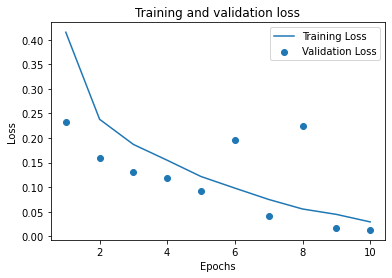

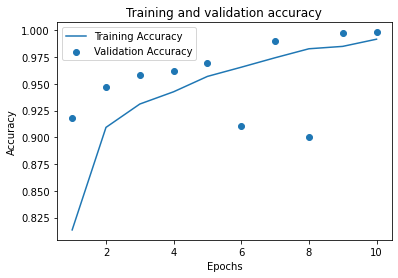

In [47]:
history4_dict = history4.history
history4_dict.keys()
loss_values4= history4_dict['loss']
val_loss_values4= history4_dict['val_loss']
acc_values4= history4_dict['accuracy']
val_acc_values4 = history4_dict['val_accuracy']
epochs4 = range(1,len(loss_values4)+1)

plt.plot(epochs4,loss_values4, label='Training Loss')
plt.scatter(epochs4, val_loss_values4, label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs4,acc_values4, label='Training Accuracy')
plt.scatter(epochs4, val_acc_values4, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> **Change the loss function**

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
history5 = model.fit(x_train, y_train, epochs=10, batch_size=512 ,validation_data=(x_val, y_val))
results5 = model.evaluate(x_test, y_test)
print(results5)

Epoch 1/10
49/49 [==============================] - 2s 35ms/step - loss: 0.1350 - accuracy: 0.8196 - val_loss: 0.0703 - val_accuracy: 0.9212
Epoch 2/10
49/49 [==============================] - 1s 28ms/step - loss: 0.0708 - accuracy: 0.9123 - val_loss: 0.0522 - val_accuracy: 0.9404
Epoch 3/10
49/49 [==============================] - 1s 27ms/step - loss: 0.0537 - accuracy: 0.9332 - val_loss: 0.0435 - val_accuracy: 0.9479
Epoch 4/10
49/49 [==============================] - 1s 28ms/step - loss: 0.0437 - accuracy: 0.9459 - val_loss: 0.0270 - val_accuracy: 0.9723
Epoch 5/10
49/49 [==============================] - 1s 27ms/step - loss: 0.0350 - accuracy: 0.9595 - val_loss: 0.0212 - val_accuracy: 0.9790
Epoch 6/10
49/49 [==============================] - 1s 27ms/step - loss: 0.0290 - accuracy: 0.9654 - val_loss: 0.0161 - val_accuracy: 0.9847
Epoch 7/10
49/49 [==============================] - 1s 27ms/step - loss: 0.0236 - accuracy: 0.9732 - val_loss: 0.0138 - val_accuracy: 0.9871
Epoch 8/10
49

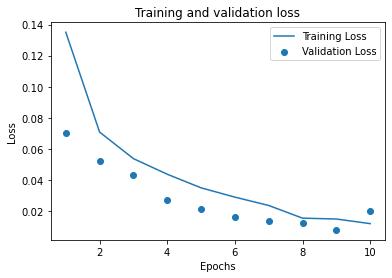

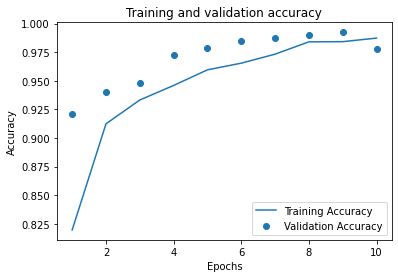

In [49]:
history5_dict = history5.history
history5_dict.keys()
loss_values5= history5_dict['loss']
val_loss_values5= history5_dict['val_loss']
acc_values5= history5_dict['accuracy']
val_acc_values5 = history5_dict['val_accuracy']
epochs5 = range(1,len(loss_values5)+1)

plt.plot(epochs5,loss_values5, label='Training Loss')
plt.scatter(epochs5, val_loss_values5, label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs5,acc_values5, label='Training Accuracy')
plt.scatter(epochs5, val_acc_values5, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> **Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu**

In [50]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
history6= model.fit(x_train, y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results6 = model.evaluate(x_test, y_test)
print(results6)

Epoch 1/8
49/49 [==============================] - 2s 35ms/step - loss: 0.1292 - accuracy: 0.8214 - val_loss: 0.0583 - val_accuracy: 0.9285
Epoch 2/8
49/49 [==============================] - 1s 27ms/step - loss: 0.0680 - accuracy: 0.9091 - val_loss: 0.0479 - val_accuracy: 0.9400
Epoch 3/8
49/49 [==============================] - 1s 27ms/step - loss: 0.0535 - accuracy: 0.9312 - val_loss: 0.0335 - val_accuracy: 0.9613
Epoch 4/8
49/49 [==============================] - 1s 27ms/step - loss: 0.0432 - accuracy: 0.9450 - val_loss: 0.0298 - val_accuracy: 0.9652
Epoch 5/8
49/49 [==============================] - 2s 44ms/step - loss: 0.0394 - accuracy: 0.9504 - val_loss: 0.0243 - val_accuracy: 0.9733
Epoch 6/8
49/49 [==============================] - 1s 27ms/step - loss: 0.0328 - accuracy: 0.9609 - val_loss: 0.0251 - val_accuracy: 0.9715
Epoch 7/8
49/49 [==============================] - 1s 27ms/step - loss: 0.0312 - accuracy: 0.9626 - val_loss: 0.0216 - val_accuracy: 0.9752
Epoch 8/8
782/782 [=

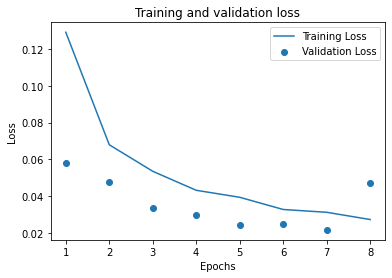

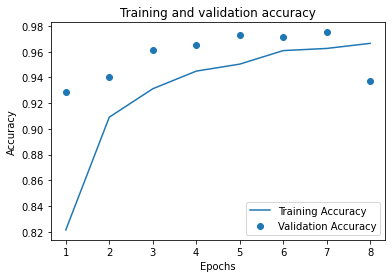

In [51]:
history6_dict = history6.history
history6_dict.keys()
loss_values6= history6_dict['loss']
val_loss_values6= history6_dict['val_loss']
acc_values6= history6_dict['accuracy']
val_acc_values6 = history6_dict['val_accuracy']
epochs6 = range(1,len(loss_values6)+1)

plt.plot(epochs6,loss_values6, label='Training Loss')
plt.scatter(epochs6, val_loss_values6, label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs6,acc_values6, label='Training Accuracy')
plt.scatter(epochs6, val_acc_values6, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()